# 📊 Bitcoin Market Analysis (Merged Historical + Real-Time)
This notebook combines **historical hourly** and **real-time streamed** Bitcoin data to perform a holistic analysis. We aim to uncover patterns, anomalies, and price behavior useful for:
- 📈 Trend detection (daily, hourly, minutely)
- 📉 Volatility and anomaly spotting
- 🤔 Buy/sell signal exploration

In [3]:
# 📦 Imports and setup
import sys, os, glob
sys.path.append(os.path.join(os.getcwd(), 'src'))

from bitcoin_utils import load_length_delimited_protobuf_file, protobufs_to_dataframe
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# 📂 Load all .pb files from src/data/
print("🔄 Scanning for all .pb files in src/data/...")
file_paths = sorted(glob.glob("src/data/bitcoin_data_*.pb"))

all_real_msgs = []
for path in file_paths:
    print(f"📥 Loading: {path}")
    msgs = load_length_delimited_protobuf_file(path)
    all_real_msgs.extend(msgs)

# 🧾 Convert to DataFrame
real_msgs = all_real_msgs                         # ✅ alias preserved
real_df = protobufs_to_dataframe(real_msgs)       # ✅ alias preserved

print(f"✅ Total records loaded: {len(real_df)}")
display(real_df.tail())

🔄 Scanning for all .pb files in src/data/...
📥 Loading: src/data/bitcoin_data_2025-05-13.pb
📥 Loading: src/data/bitcoin_data_2025-05-14.pb
✅ Total records loaded: 49


,timestamp,id,symbol,name,current_price,market_cap,total_volume,high_24h,low_24h,price_change_24h,market_cap_rank,circulating_supply,ath,atl,source,last_updated
44,1747178623,bitcoin,btc,Bitcoin,104132.0,2.068425e+12,3.382491e+10,104836.0,101698.0,1094.65,1,19864318.0,108786.0,67.81,coingecko,2025-05-13T23:22:14.245Z
45,1747178653,bitcoin,btc,Bitcoin,104127.0,2.068425e+12,3.374273e+10,104836.0,101698.0,1088.95,1,19864318.0,108786.0,67.81,coingecko,2025-05-13T23:23:13.316Z
46,1747178683,bitcoin,btc,Bitcoin,104142.0,2.068381e+12,3.241723e+10,104836.0,101698.0,1104.47,1,19864318.0,108786.0,67.81,coingecko,2025-05-13T23:24:19.545Z
47,1747181697,bitcoin,btc,Bitcoin,104046.0,2.067527e+12,3.436477e+10,104836.0,101698.0,1446.13,1,19864318.0,108786.0,67.81,coingecko,2025-05-14T00:14:01.111Z
48,1747181727,bitcoin,btc,Bitcoin,104046.0,2.067527e+12,3.436477e+10,104836.0,101698.0,1446.13,1,19864318.0,108786.0,67.81,coingecko,2025-05-14T00:14:01.111Z


## 🔄 Load and Combine Historical + Real-Time Data

In [4]:
# 🕒 Convert timestamps to datetime format
real_df["datetime"] = pd.to_datetime(real_df["timestamp"], unit="s")
real_df = real_df.sort_values("datetime")
real_df.set_index("datetime", inplace=True)

## ⏱️ Bitcoin Price - Last 24 Hours

/tmp/ipykernel_30/40240305.py:9: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


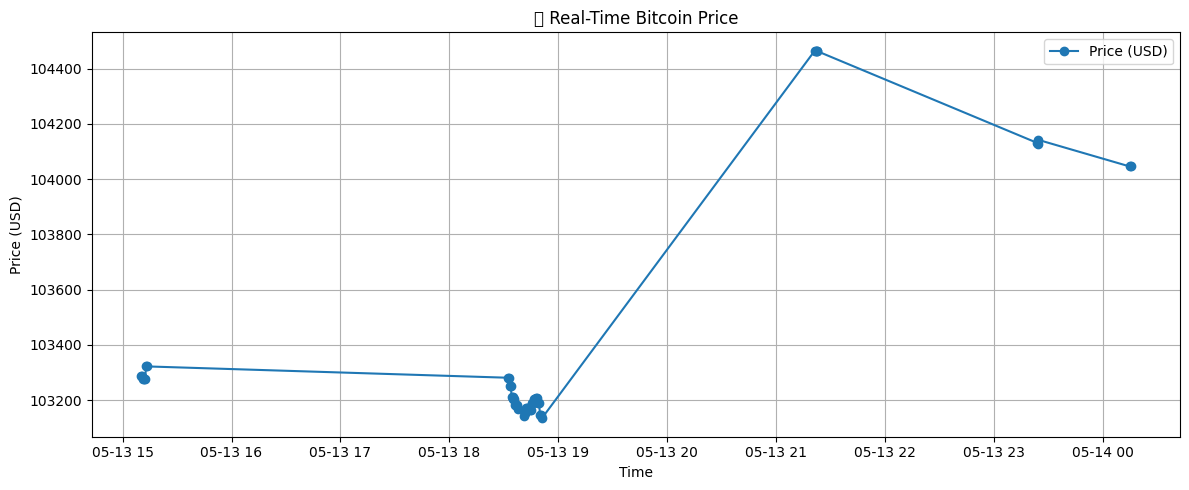

In [5]:
# ⏱️ Bitcoin Price - Last 24 Hours (or all collected so far)
plt.figure(figsize=(12, 5))
plt.plot(real_df.index, real_df["current_price"], marker='o', linestyle='-', label="Price (USD)")
plt.title("⏱️ Real-Time Bitcoin Price")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_30/3010545903.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_30/3010545903.py:19: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


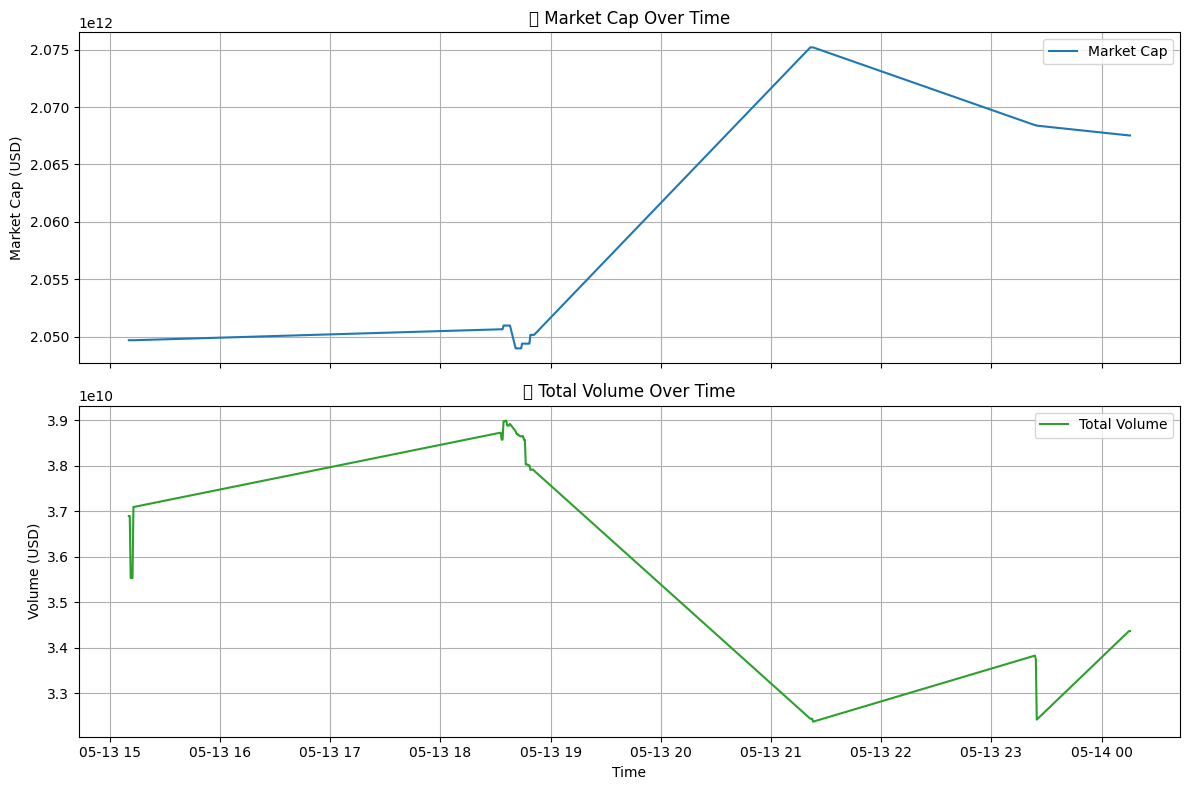

In [6]:
# 📈 Market Cap & Volume Trends
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Market Cap
ax[0].plot(real_df.index, real_df["market_cap"], color='tab:blue', label="Market Cap")
ax[0].set_ylabel("Market Cap (USD)")
ax[0].set_title("📊 Market Cap Over Time")
ax[0].grid(True)
ax[0].legend()

# Volume
ax[1].plot(real_df.index, real_df["total_volume"], color='tab:green', label="Total Volume")
ax[1].set_ylabel("Volume (USD)")
ax[1].set_title("💹 Total Volume Over Time")
ax[1].grid(True)
ax[1].legend()

plt.xlabel("Time")
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/3142934727.py:12: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


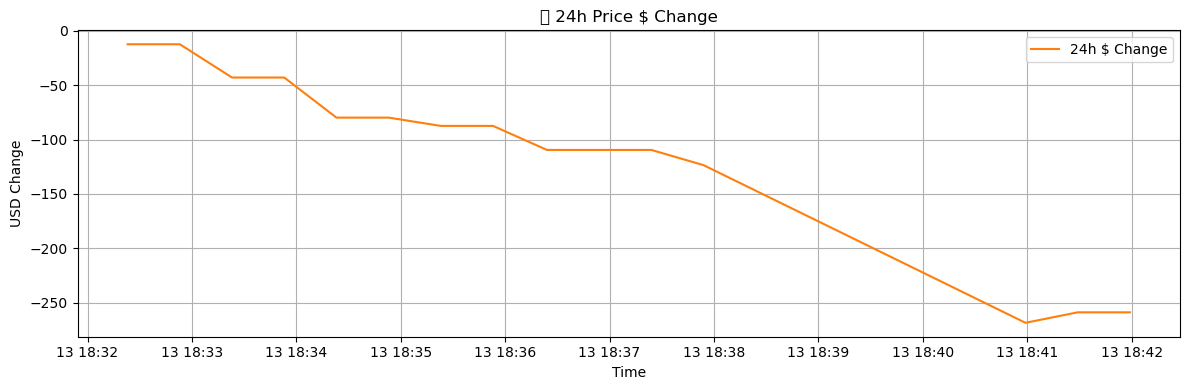

In [10]:
# 🔍 Price Change Statistics (using available fields)
if "price_change_24h" in real_df.columns:
    real_df["price_change_abs"] = real_df["price_change_24h"]

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(real_df.index, real_df["price_change_abs"], color='tab:orange', label="24h $ Change")
    ax.set_ylabel("USD Change")
    ax.set_title("💰 24h Price $ Change")
    ax.grid(True)
    ax.legend()
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'price_change_24h' not available in data.")

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/1158498963.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


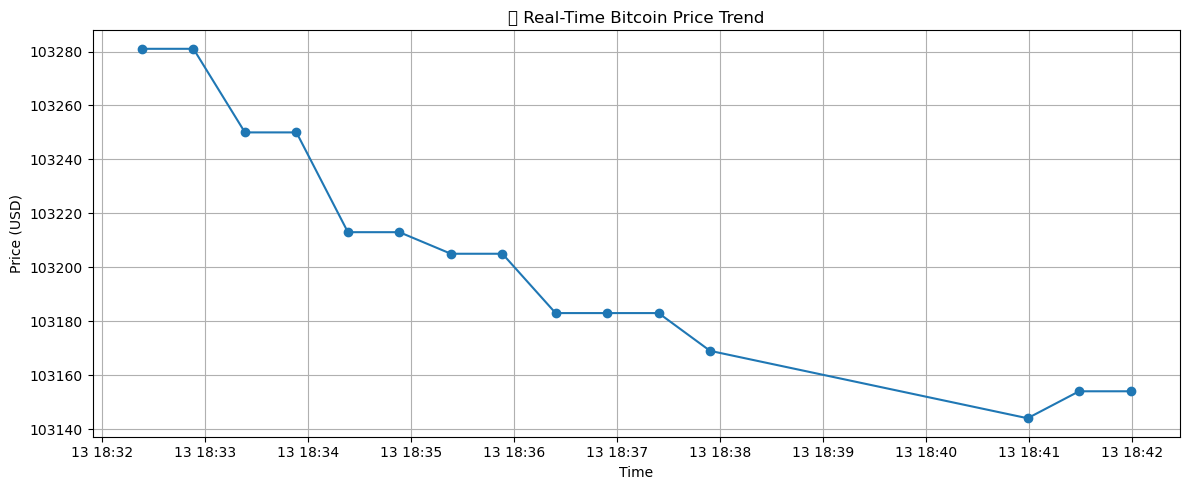

In [18]:
# Reset index in case 'datetime' is already an index
real_df = real_df.reset_index(drop=True)

# Assign proper datetime
real_df["datetime"] = pd.to_datetime(real_df["timestamp"], unit="s")

# Set as index and sort
real_df = real_df.sort_values("datetime").set_index("datetime")

# Plot real-time price trend
plt.figure(figsize=(12, 5))
plt.plot(real_df.index, real_df["current_price"], marker='o', linestyle='-')
plt.title("📈 Real-Time Bitcoin Price Trend")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/2593929765.py:13: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


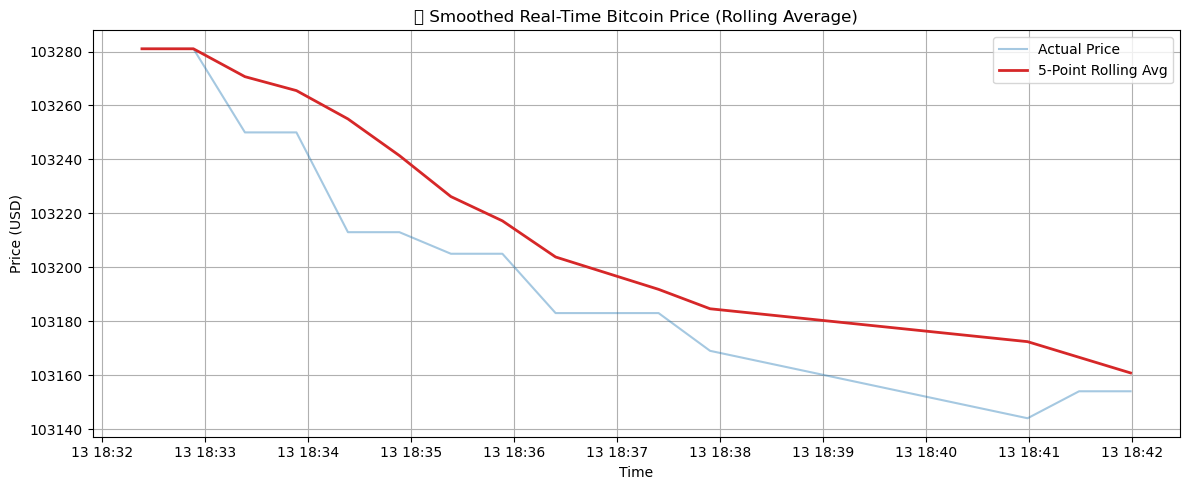

In [12]:
# Calculate 5-point rolling average
real_df["price_rolling_avg"] = real_df["current_price"].rolling(window=5, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(real_df.index, real_df["current_price"], alpha=0.4, label="Actual Price")
plt.plot(real_df.index, real_df["price_rolling_avg"], linewidth=2, label="5-Point Rolling Avg", color="tab:red")
plt.title("📉 Smoothed Real-Time Bitcoin Price (Rolling Average)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/2039600173.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


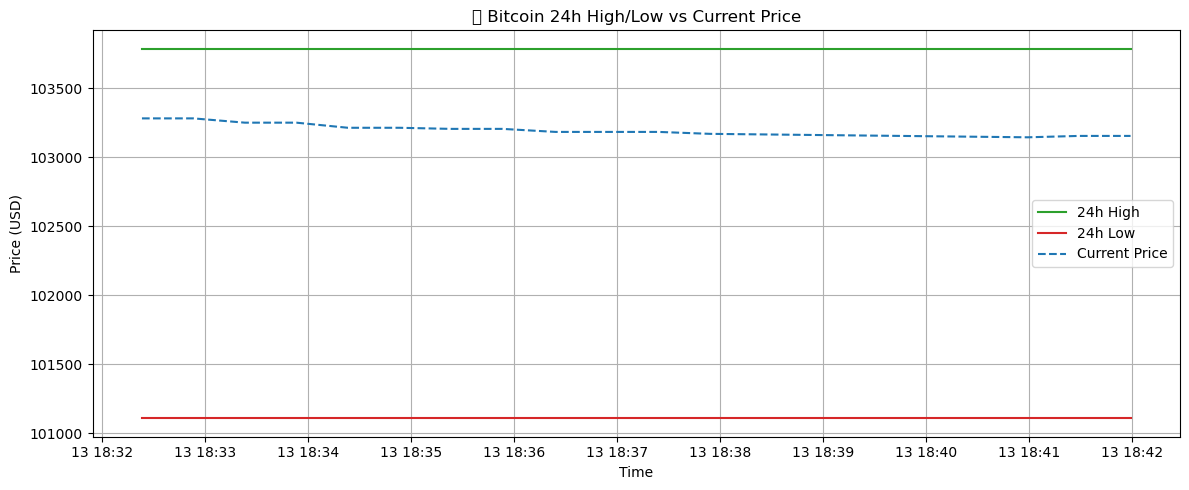

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(real_df.index, real_df["high_24h"], label="24h High", color="tab:green")
plt.plot(real_df.index, real_df["low_24h"], label="24h Low", color="tab:red")
plt.plot(real_df.index, real_df["current_price"], label="Current Price", color="tab:blue", linestyle="--")

plt.title("📊 Bitcoin 24h High/Low vs Current Price")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/4092657292.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


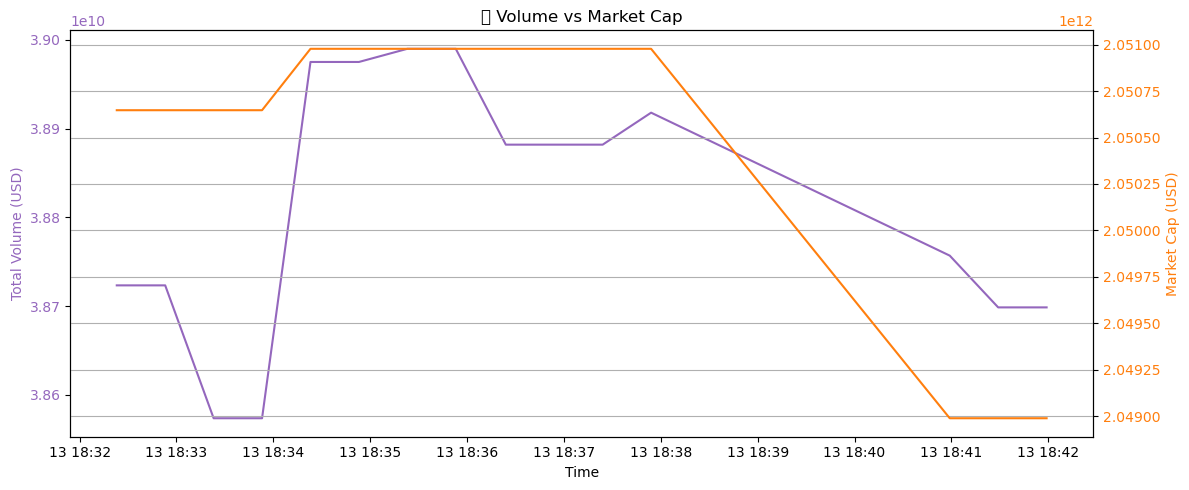

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_xlabel("Time")
ax1.set_ylabel("Total Volume (USD)", color='tab:purple')
ax1.plot(real_df.index, real_df["total_volume"], label="Volume", color='tab:purple')
ax1.tick_params(axis='y', labelcolor='tab:purple')

ax2 = ax1.twinx()
ax2.set_ylabel("Market Cap (USD)", color='tab:orange')
ax2.plot(real_df.index, real_df["market_cap"], label="Market Cap", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("📦 Volume vs Market Cap")
fig.tight_layout()
plt.grid(True)
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/416645781.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


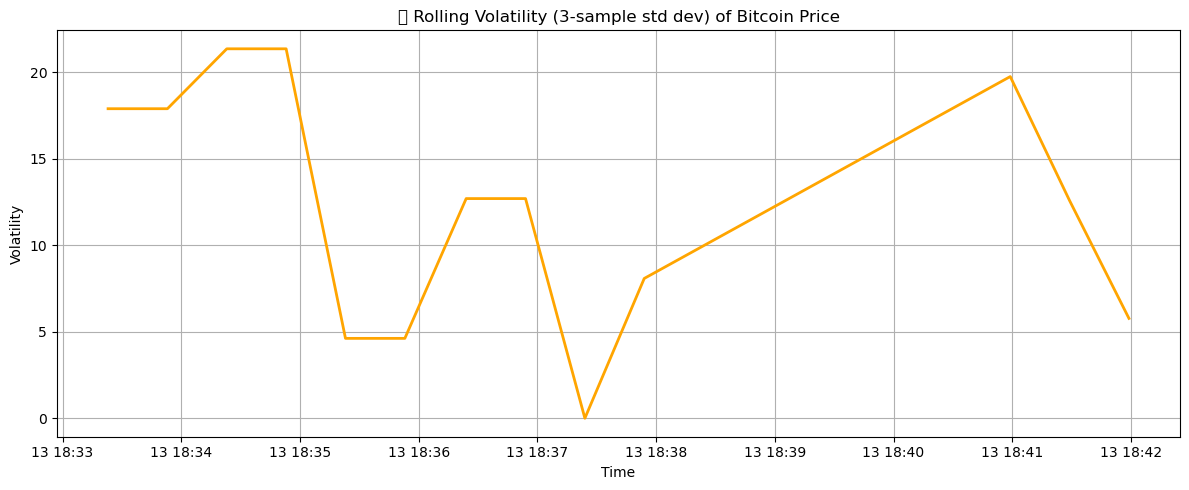

In [19]:
# Rolling volatility (standard deviation over 3-sample window)
real_df["rolling_std"] = real_df["current_price"].rolling(window=3).std()

plt.figure(figsize=(12, 5))
plt.plot(real_df.index, real_df["rolling_std"], color='orange', linewidth=2)
plt.title("📉 Rolling Volatility (3-sample std dev) of Bitcoin Price")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/262213935.py:9: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


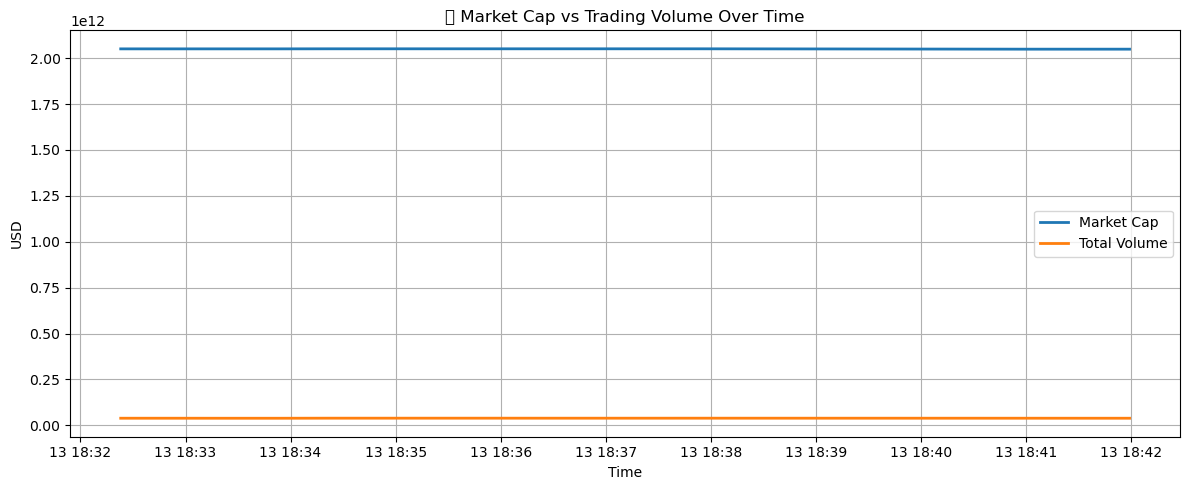

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(real_df.index, real_df["market_cap"], label="Market Cap", linewidth=2)
plt.plot(real_df.index, real_df["total_volume"], label="Total Volume", linewidth=2)
plt.title("💰 Market Cap vs Trading Volume Over Time")
plt.xlabel("Time")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/2223003732.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


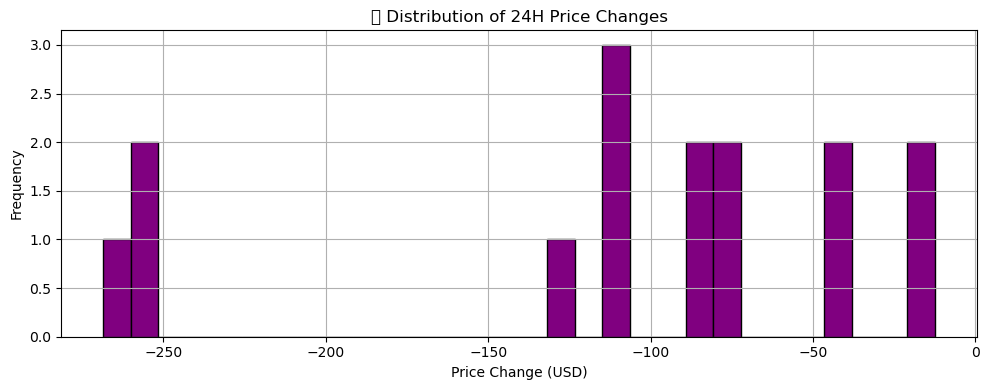

In [21]:
# Remove missing values
change_col = "price_change_24h"
if change_col in real_df.columns:
    real_df = real_df.dropna(subset=[change_col])

plt.figure(figsize=(10, 4))
plt.hist(real_df["price_change_24h"], bins=30, color='purple', edgecolor='black')
plt.title("📊 Distribution of 24H Price Changes")
plt.xlabel("Price Change (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_98669/310387038.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


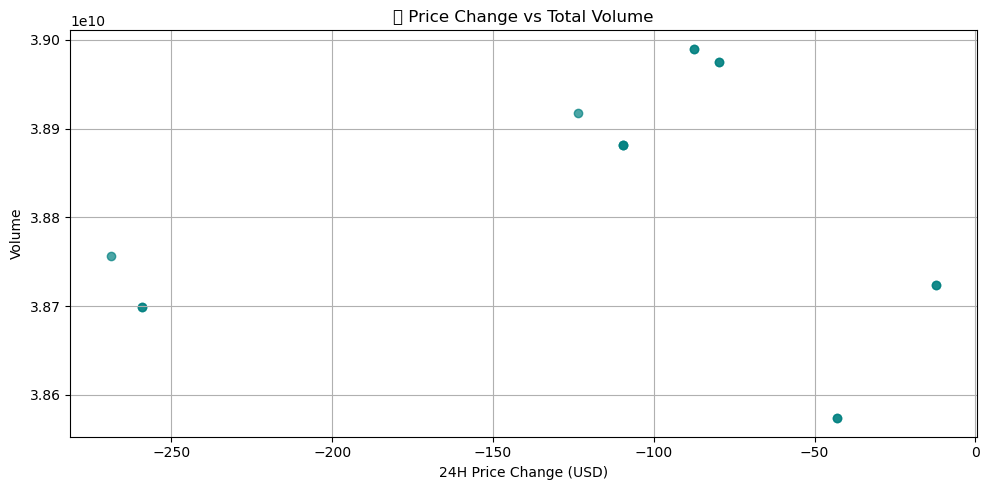

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(real_df["price_change_24h"], real_df["total_volume"], alpha=0.7, color='teal')
plt.title("📉 Price Change vs Total Volume")
plt.xlabel("24H Price Change (USD)")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
latest = real_df.iloc[-1]
print("🧾 Latest Snapshot:")
display(latest[["current_price", "market_cap", "total_volume", "price_change_24h", "market_cap_rank"]])

🧾 Latest Snapshot:


current_price              103154.0
market_cap          2048988107629.0
total_volume          38698551410.0
price_change_24h        -258.979994
market_cap_rank                   1
Name: 2025-05-13 18:41:59, dtype: object